In [130]:
#Importing all the necessary libraries to build the model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

In [131]:
#Reading the dataset and displaying the first 5 rows.
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Exploratory Data Analysis

In [132]:
#Using describe() to get an idea of the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [133]:
#Checking which of the columns have null values to impute.
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Dealing with missing data

In [134]:
#After looking at the dataset, imputing the null values with values that are suitable(mostly 0s).
df['agent'].fillna(0, inplace = True)
df['company'].fillna(0, inplace = True)
df['country'].fillna('Unknown', inplace = True)
df['children'].fillna(0, inplace = True)


In [135]:
#Checking how many different values are there in each column
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

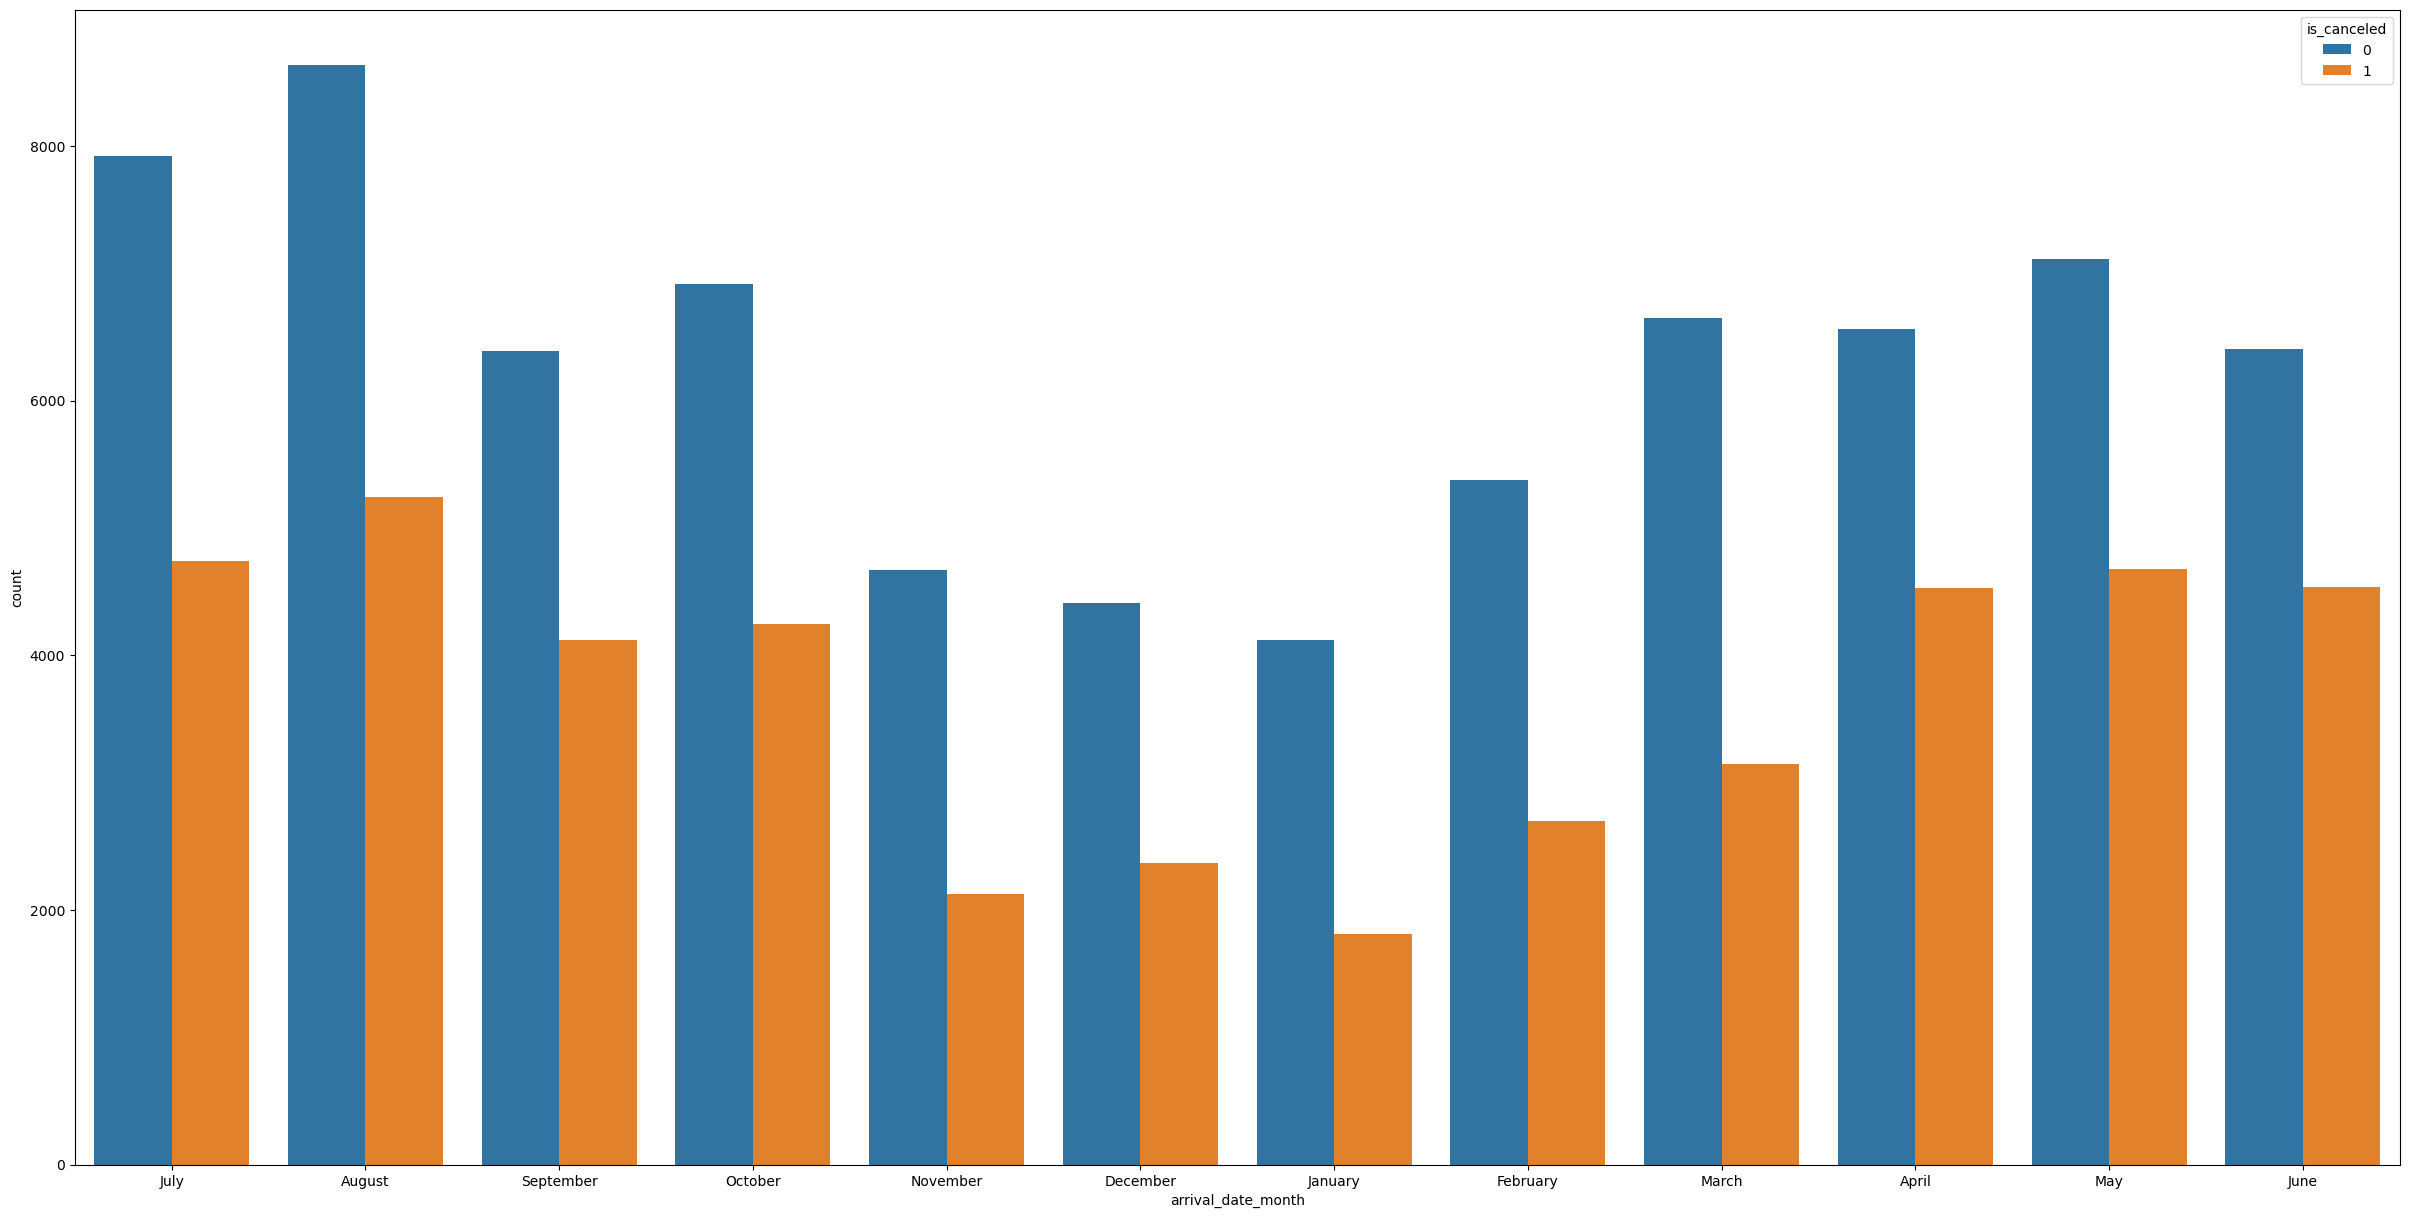

In [136]:
plt.figure(figsize=(30, 15))
sns.countplot(data = df, x = 'arrival_date_month', hue = 'is_canceled')

In [137]:
#August has most cancelations

### Using one-hot encoding techniques

In [138]:
#Using one-hot encoding techniques to convert string variables to integer.
df['hotel'] = [1 if x in ['Resort Hotel'] else 0 for x in df['hotel']]

df.drop(['country', 'meal'], axis = 1, inplace = True)

In [139]:
#Using one-hot encoding techniques to convert string variables to integer
df = pd.get_dummies(df, columns = ['arrival_date_month','market_segment', 'distribution_channel', 'deposit_type', 'customer_type'])

In [140]:
#Converting date-time values to numerical values.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y/%m/%d')
df['res_y'] = df['reservation_status_date'].dt.year
df['res_m'] = df['reservation_status_date'].dt.month
df['res_d'] = df['reservation_status_date'].dt.day

In [141]:
#Checking whether the assigned room type is the same type as the reserved room type as this can have a major effect on whether
#the room is being cancelled or not.
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [142]:
#Dropping features that are unnecessary.
df.drop(['assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date'], axis=1, inplace=True)

<AxesSubplot:>

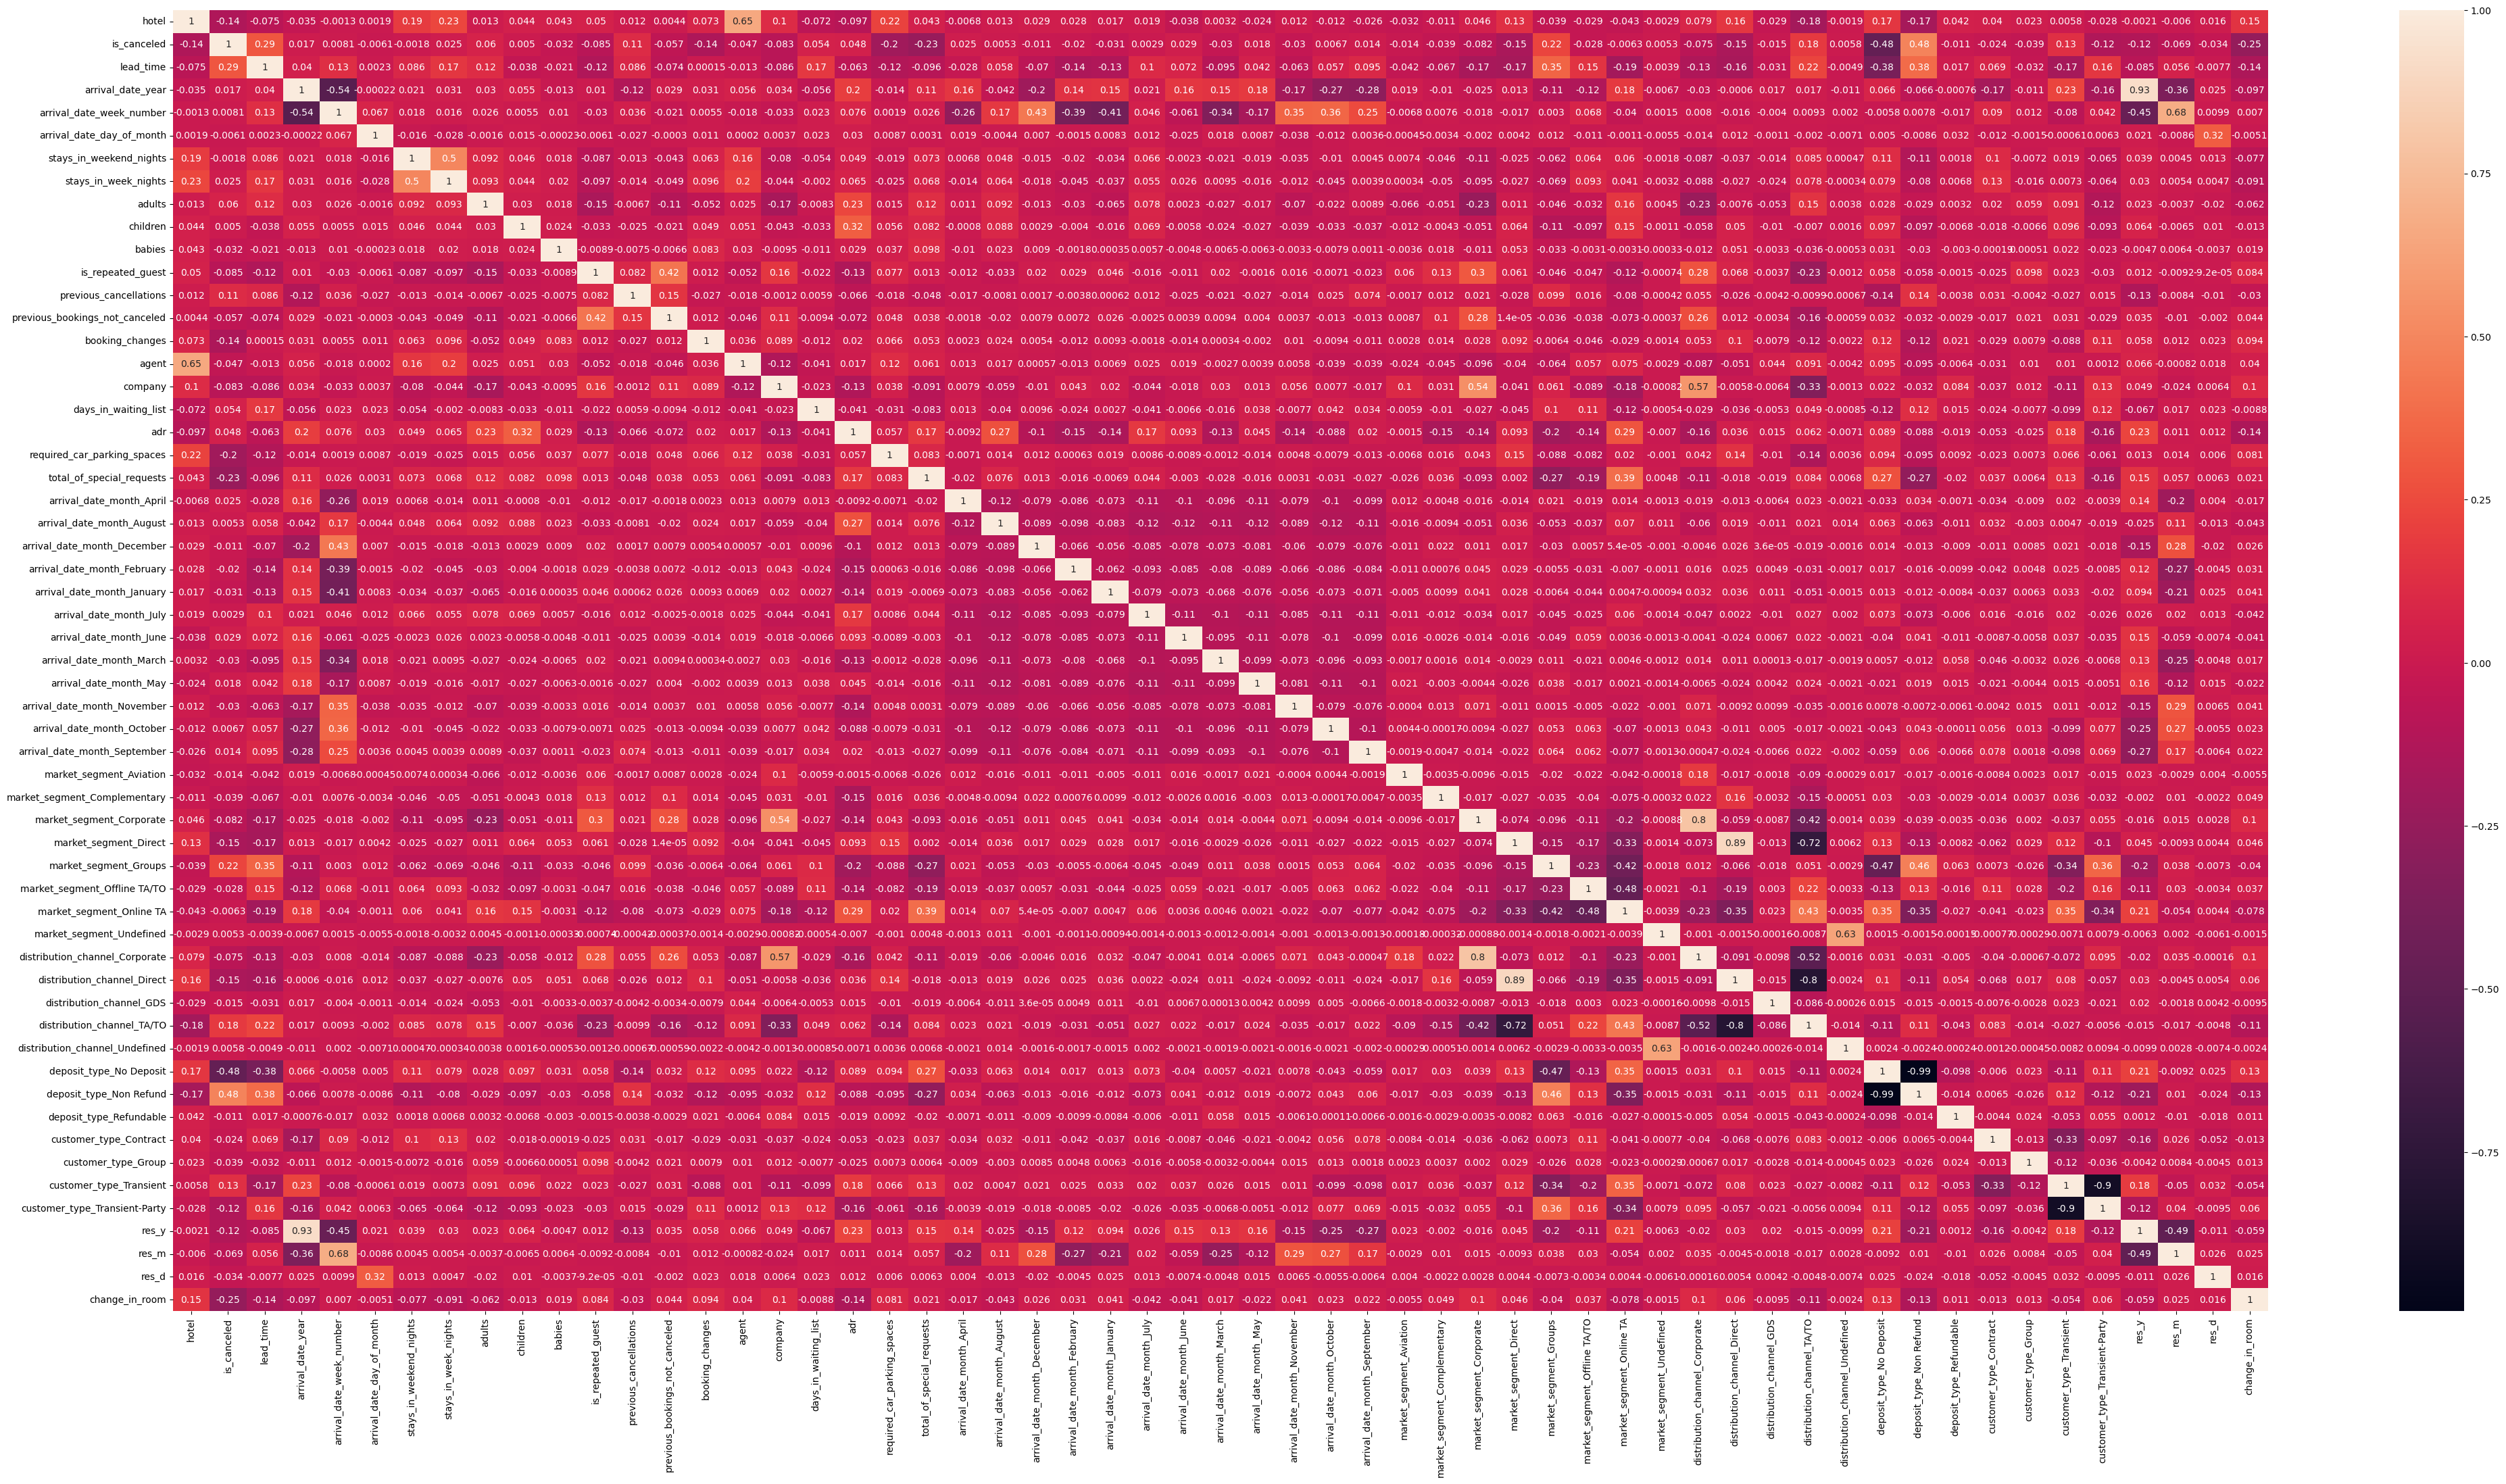

In [143]:
#Plotting a heatmap to determine which factors are highly correlated.
plt.figure(figsize=(50, 25))
sns.heatmap(df.corr(), annot = True)

In [144]:
#High correlation for is_canceled is with deposit_type_No Deposit, deposit_type_Non Refund, market_segment_Groups, lead_time

### Checking for outliers

In [145]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,res_y,res_m,res_d
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,0.092880,0.116233,0.056789,0.067577,0.049661,0.106047,0.091624,0.082034,0.098760,0.056906,0.093475,0.088014,0.001985,0.006223,0.044350,0.105587,0.165935,0.202856,0.473046,0.000017,0.055926,0.122665,0.001617,0.819750,0.000042,0.876464,0.122179,0.001357,0.03414,0.004833,0.750591,0.210436,2016.093743,6.334123,15.666639
std,0.472181,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.290266,0.320505,0.231439,0.251019,0.217244,0.307900,0.288496,0.274417,0.298341,0.231664,0.291098,0.283317,0.044510,0.078642,0.205873,0.307309,0.372024,0.402128,0.499275,0.004093,0.229780,0.328054,0.040174,0.384397,0.006471,0.329053,0.327494,0.036811,0.18159,0.069351,0.432673,0.407620,0.715306,3.346352,8.778432
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,

C:\Users\rzctx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

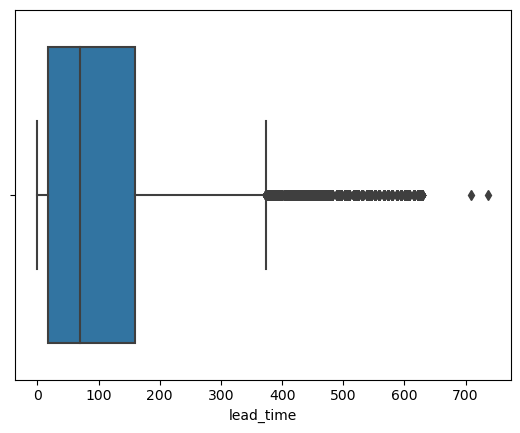

In [146]:
sns.boxplot(df['lead_time'])

In [147]:
#There are a lot of outliers in lead_time. However, lead_time the outliers in lead_time could possibly be an indication of 
#higher or lower cancelations in hotels. So I'm choosing to keep it in the dataset. If the model is not performing well, 
#we can later try removing these outliers and try it again.

C:\Users\rzctx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stays_in_weekend_nights'>

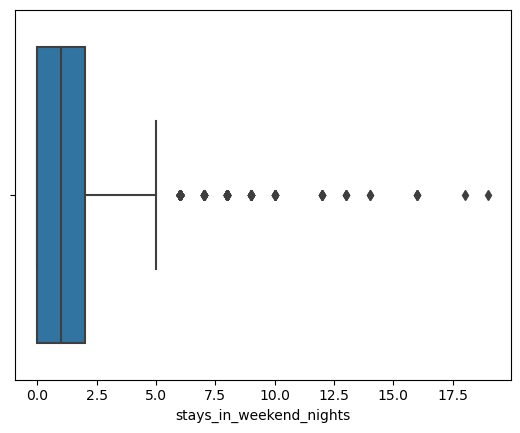

In [148]:
sns.boxplot(df['stays_in_weekend_nights'])

In [149]:
#Not a lot of outliers in the data. This won't be affecting the output of the results as much,
#Since the number of outliers is huge compared to the quantity of data. However,if the model perfomance is low, we can remove
#these outliers and try again.


### Using MinMaxScaler() to Normalize data

In [150]:
#Seperating the dataframe into independent and dependent variables.
X = pd.DataFrame(df.drop(['is_canceled'], axis = 1))
y = df['is_canceled']
scal = MinMaxScaler()
col = X.columns
X = pd.DataFrame(scal.fit_transform(X))
X.columns = col

In [151]:
#Splitting training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [152]:
#Running a preliminary model with all the features
model = MLPClassifier()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.9987436133679538

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14934
           1       1.00      1.00      1.00      8944

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



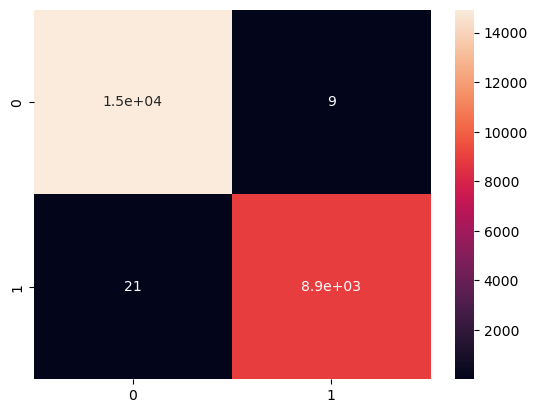

In [153]:
#Evaluating the model based on multiple parameters like F1-score, precision and recall
ypred = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

In [154]:
#Running a preliminary RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9591674344584974

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14934
           1       0.99      0.90      0.94      8944

    accuracy                           0.96     23878
   macro avg       0.97      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



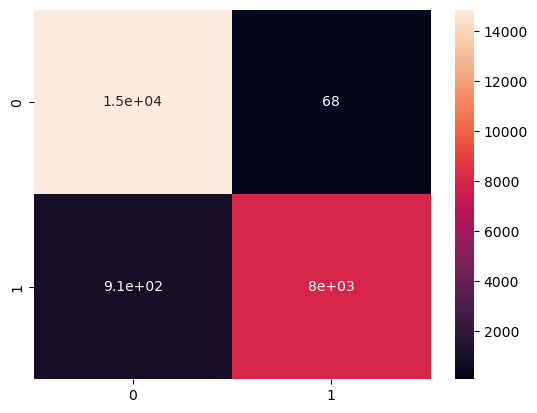

In [155]:
#Evaluating the model based on multiple parameters like F1-score, precision and recall
ypred = rfc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

# Reducing the number of features used to minimize data requirement and model run time

### Only taking the top 50% of the data that has the highest feature importance for the Random Forest Classifier

In [156]:
j = 0
for i in X.columns:
    print(i, rfc.feature_importances_[j])    
    j=j+1
fimpt = pd.DataFrame()
fimpt['ColName'] = X.columns
fimpt['Val'] = rfc.feature_importances_
print("Done")

hotel 0.0069177827591934485
lead_time 0.0910578007469155
arrival_date_year 0.014419129410252873
arrival_date_week_number 0.06434088396921019
arrival_date_day_of_month 0.05221652504542002
stays_in_weekend_nights 0.01510203975384537
stays_in_week_nights 0.02372062833447614
adults 0.009467826027774857
children 0.004548628676722062
babies 0.0006241793938502324
is_repeated_guest 0.001554925226101266
previous_cancellations 0.035299712213099244
previous_bookings_not_canceled 0.0027559200606533463
booking_changes 0.016103988406284298
agent 0.0288177452449
company 0.004036919513215846
days_in_waiting_list 0.0016926726281908425
adr 0.04984203871395834
required_car_parking_spaces 0.017562639641755147
total_of_special_requests 0.04300829743982624
arrival_date_month_April 0.00598594897946427
arrival_date_month_August 0.005771099044967091
arrival_date_month_December 0.0047246857637068046
arrival_date_month_February 0.004723322263242307
arrival_date_month_January 0.005651046403793791
arrival_date_mon

In [157]:
#Checking and removing the features that are not important. The lower 50% of the features are removed.
fimpt.loc[fimpt['Val'] < fimpt['Val'].median()] = None
fimpt.dropna(inplace = True)

In [158]:
#Creating a new Independent variable with the new selected features.
X_new = X[fimpt['ColName']]

Xtrain,Xtest,ytrain,ytest = train_test_split(X_new,y,test_size = 0.2, random_state = 0)

In [159]:
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9593349526761036

In [160]:
#There hasn't been any major change in test score, so we can remove the next 50% of features, 
#making it 25% from the initial feature set.

In [161]:
j = 0
for i in X_new.columns:
    print(i, rfc.feature_importances_[j])    
    j=j+1
fimpt = pd.DataFrame()
fimpt['ColName'] = X_new.columns
fimpt['Val'] = rfc.feature_importances_
print("Done")

hotel 0.007271881509256726
lead_time 0.09179062461718455
arrival_date_year 0.01617654543398822
arrival_date_week_number 0.09093558691055513
arrival_date_day_of_month 0.06091318453781776
stays_in_weekend_nights 0.015209583613135074
stays_in_week_nights 0.02490381850775903
adults 0.009728755907120417
previous_cancellations 0.03529865285274432
booking_changes 0.016589426513395927
agent 0.03414687352674928
adr 0.05488581034850887
required_car_parking_spaces 0.01883140890781419
total_of_special_requests 0.045512390025124416
arrival_date_month_April 0.006563049542427981
arrival_date_month_August 0.006698180974674101
market_segment_Groups 0.00862615811188405
market_segment_Offline TA/TO 0.008018570441834313
market_segment_Online TA 0.0214761461349174
distribution_channel_TA/TO 0.0076173174853460986
deposit_type_No Deposit 0.0809354438954612
deposit_type_Non Refund 0.09603046575341947
customer_type_Transient 0.012088455792752396
customer_type_Transient-Party 0.009681310404795366
res_y 0.020339

In [162]:
#Checking and removing the features that are not important. The lower 50% of the features are removed.
fimpt.loc[fimpt['Val'] < fimpt['Val'].median()] = None
fimpt.dropna(inplace = True)

In [163]:
#Creating a new Independent variable with the new selected features.
X_new_25 = X[fimpt['ColName']]

Xtrain,Xtest,ytrain,ytest = train_test_split(X_new_25,y,test_size = 0.2, random_state = 0)

In [164]:
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9685484546444426

In [165]:
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.9978222631711199

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14934
           1       1.00      0.99      1.00      8944

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



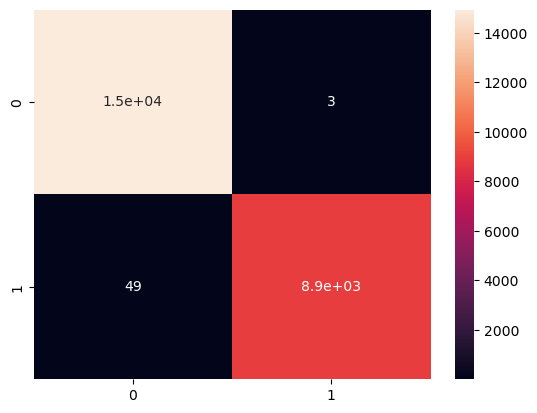

In [166]:
ypred = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

In [167]:
#There hasn't been any major reduction in test score. In fact, test score has increased.
#so we can further remove the next 50% of features, keeping the only 12.5% 
#of the initial feature set.

In [168]:
j = 0
for i in X_new_25.columns:
    print(i, rfc.feature_importances_[j])    
    j=j+1
fimpt = pd.DataFrame()
fimpt['ColName'] = X_new_25.columns
fimpt['Val'] = rfc.feature_importances_
print("Done")

lead_time 0.10192626725544977
arrival_date_week_number 0.13200588713185896
arrival_date_day_of_month 0.09333909668740167
stays_in_week_nights 0.031067172453298517
previous_cancellations 0.040612559447309196
agent 0.04060790168138487
adr 0.06411161518548548
total_of_special_requests 0.04399038561085646
market_segment_Online TA 0.03311281229679553
deposit_type_No Deposit 0.07723337175809403
deposit_type_Non Refund 0.11234141237200822
res_m 0.09530308115759345
res_d 0.1051666558084035
change_in_room 0.029181781154060414
Done


In [169]:
#Checking and removing the features that are not important. The lower 50% of the features are removed.
fimpt.loc[fimpt['Val'] < fimpt['Val'].median()] = None
fimpt.dropna(inplace = True)

In [170]:
#Creating a new Independent variable with the new selected features.
X_new_12 = X[fimpt['ColName']]

Xtrain,Xtest,ytrain,ytest = train_test_split(X_new_12,y,test_size = 0.2, random_state = 0)

In [171]:
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9865985425915068

In [172]:
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9941368623837842

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14934
           1       0.99      1.00      0.99      8944

    accuracy                           0.99     23878
   macro avg       0.99      1.00      0.99     23878
weighted avg       0.99      0.99      0.99     23878



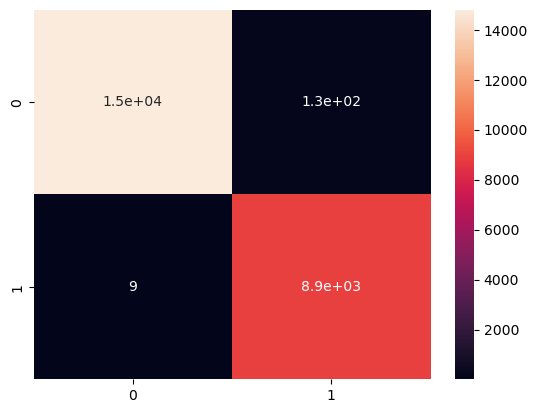

In [173]:
ypred = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

In [174]:
#The accuracy score and other metrics like F-1 Score, precision and recall drop significantly when only 12.5% of the
#features are used. So ideally we take 25% of the initial features to have an optimized model with minimized
#data occupancy and run-time of the model.

In [175]:
#Using the stored X value for the 25% of initial values since it was found to be optimal in terms of data occupancy.
Xtrain,Xtest,ytrain,ytest = train_test_split(X_new_25,y, test_size = 0.2, random_state = 0)

In [176]:
rfc.fit(Xtrain,ytrain)
np.shape(Xtrain)
print( '14 features are used to build the model :')
for i in Xtrain.columns:
    print(i)

14 features are used to build the model :
lead_time
arrival_date_week_number
arrival_date_day_of_month
stays_in_week_nights
previous_cancellations
agent
adr
total_of_special_requests
market_segment_Online TA
deposit_type_No Deposit
deposit_type_Non Refund
res_m
res_d
change_in_room


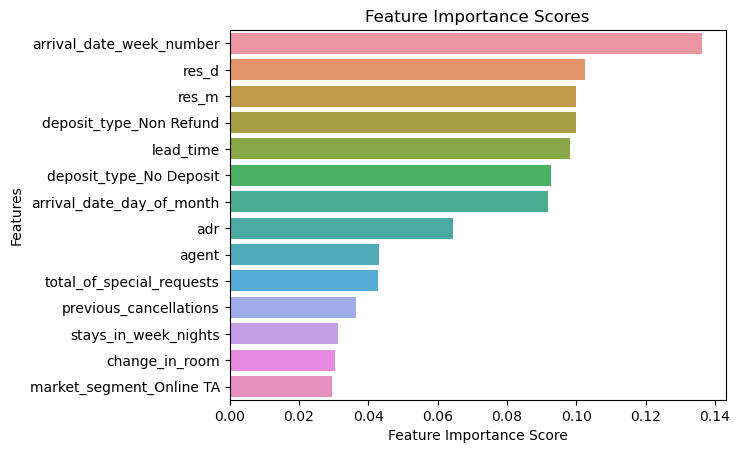

In [177]:
feature_imp_clf1 = pd.Series(rfc.feature_importances_,index = Xtrain.columns).sort_values(ascending = False)

sns.barplot(x=feature_imp_clf1, y=feature_imp_clf1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [178]:
# As infered from the correlation heatmap, deposit_type_No Deposit, deposit_type_Non Refund, market_segment_Groups, 
#lead_time have shown to be highly important features to determine the output variable.

# Actually building all the models after feature selection and choosing the best model, with optimized run-time and data occupancy

### Using Cross Validation on the following models

In [179]:
#Fitting the RandomForestClassifier with the new selected features.
mtO = time.time()
mt = time.time()
rfc.fit(Xtrain,ytrain)
print('Time to fit model:', time.time()-mt,'seconds')
mt = time.time()
scr = cross_val_score(rfc, Xtrain, ytrain, cv = 5)
print('Time to cross validate model:', time.time()-mt,'seconds')
mt = time.time()
ypred = rfc.predict(Xtest)
print('Time to predict model:', time.time()-mt,'seconds')
print('Cross Val Score :', scr)
print('Overall time for model', time.time()-mtO)

Time to fit model: 15.97225022315979 seconds
Time to cross validate model: 64.3179030418396 seconds
Time to predict model: 0.6906452178955078 seconds
Cross Val Score : [0.96665445 0.96471758 0.9659198  0.96497749 0.96539629]
Overall time for model 80.9807984828949


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14934
           1       0.99      0.92      0.95      8944

    accuracy                           0.97     23878
   macro avg       0.97      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878

Accuracy Score : 0.9675433453388056
Precision Score : 0.9938338774029742
Recall Score : 0.919051878354204
F-1 Score : 0.9549811211153064


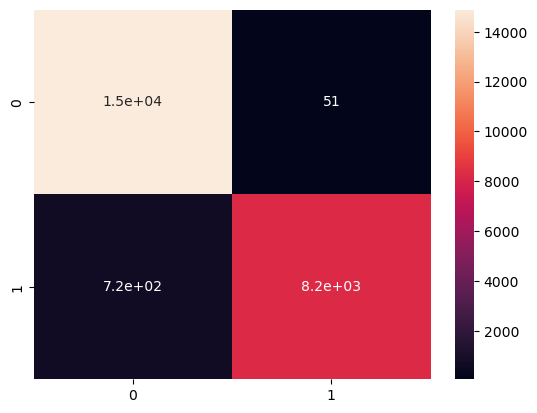

In [180]:
#I am printing the accuracy, precision, reacall and F-1 scores again even though it comes in the classification report
#because it is rounded inherently in it. Accurate scores when it is above 99.5% are not printed as it is rounded to 1.
ypred = rfc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

In [181]:
#Fitting the MLPClassifier with the new selected features.
mtO = time.time()
mt = time.time()
mlp_c = MLPClassifier()
mlp_c.fit(Xtrain,ytrain)
print('Time to fit model :', time.time()-mt, 'seconds')
mt = time.time()
scr = cross_val_score(mlp_c, Xtrain, ytrain, cv = 5)
print('Time to cross validate model:', time.time()-mt, 'seconds')
mt = time.time()
ypred = mlp_c.predict(Xtest)
print('Time to predict for model:', time.time()-mt, 'seconds')
print('Cross Val Score :', scr)
print('Time to fit and run model:', time.time()-mtO, 'seconds')

Time to fit model : 76.33227300643921 seconds
Time to cross validate model: 321.38595247268677 seconds
Time to predict for model: 0.027802228927612305 seconds
Cross Val Score : [0.99827252 0.99816783 0.99539315 0.99753952 0.99785363]
Time to fit and run model: 397.74753642082214 seconds


C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14934
           1       1.00      1.00      1.00      8944

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

Accuracy Score : 0.9987436133679538
Precision Score : 0.9994397131331242
Recall Score : 0.9972048300536672
F-1 Score : 0.9983210208193418


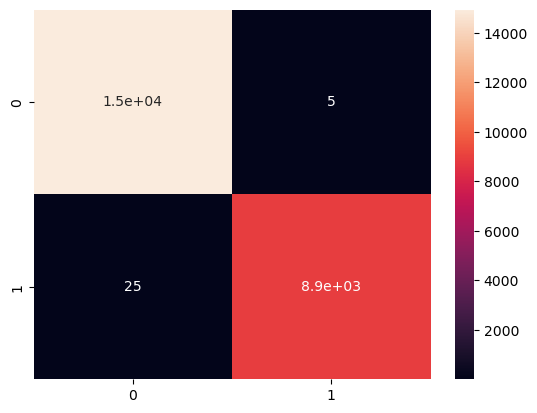

In [182]:
#I am printing the accuracy, precision, reacall and F-1 scores again even though it comes in the classification report
#because it is rounded inherently in it. Accurate scores when it is above 99.5% are not printed as it is rounded to 1.
ypred = mlp_c.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

In [183]:
#Fitting the DecisionTreeClassifier with the new selected features.
mtO = time.time()
mt = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
print('Time to fit model :', time.time()-mt, 'seconds')
mt = time.time()
scr = cross_val_score(dtc, Xtrain, ytrain, cv = 5)
print('Time to cross validate model:', time.time()-mt, 'seconds')
mt = time.time()
ypred = dtc.predict(Xtest)
print('Time to predict for model:', time.time()-mt, 'seconds')
print('Cross Val Score :', scr)
print('Time to fit and run model:', time.time()-mtO,'seconds')

Time to fit model : 0.9229590892791748 seconds
Time to cross validate model: 3.604940414428711 seconds
Time to predict for model: 0.008057594299316406 seconds
Cross Val Score : [0.9618908  0.95723185 0.9611559  0.95796252 0.95325097]
Time to fit and run model: 4.535957098007202 seconds


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14934
           1       0.95      0.95      0.95      8944

    accuracy                           0.96     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.96      0.96      0.96     23878

Accuracy Score : 0.961847725940196
Precision Score : 0.9513428475109563
Recall Score : 0.9465563506261181
F-1 Score : 0.9489435633021353


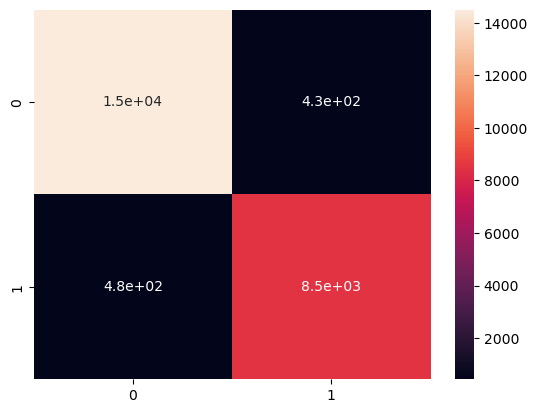

In [184]:
#I am printing the accuracy, precision, reacall and F-1 scores again even though it comes in the classification report
#because it is rounded inherently in it. Accurate scores when it is above 99.5% are not printed as it is rounded to 1.
ypred = dtc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

In [185]:
#Fitting the LogisticRegression with the new selected features.
mtO = time.time()
mt = time.time()
lr_c = LogisticRegression()
lr_c.fit(Xtrain,ytrain)
print('Time to fit model :', time.time()-mt, 'seconds')
mt = time.time()
scr = cross_val_score(lr_c, Xtrain, ytrain, cv = 5)
print('Time to cross validate model:', time.time()-mt, 'seconds')
mt = time.time()
print('Time to predict for model:', time.time()-mt, 'seconds')
ypred = lr_c.predict(Xtest)
print('Cross Val Score :', scr)
print('Time to fit and run model:', time.time()-mtO,'seconds')

C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time to fit model : 0.7353811264038086 seconds


C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Time to cross validate model: 2.8853516578674316 seconds
Time to predict for model: 0.0 seconds
Cross Val Score : [0.8084594  0.80563262 0.80818762 0.80515129 0.80604125]
Time to fit and run model: 3.6232426166534424 seconds


C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.94      0.86     14934
           1       0.86      0.58      0.69      8944

    accuracy                           0.81     23878
   macro avg       0.82      0.76      0.78     23878
weighted avg       0.82      0.81      0.80     23878

Accuracy Score : 0.8071446519809029
Precision Score : 0.86056174173176
Recall Score : 0.5789355992844365
F-1 Score : 0.6921997192701024


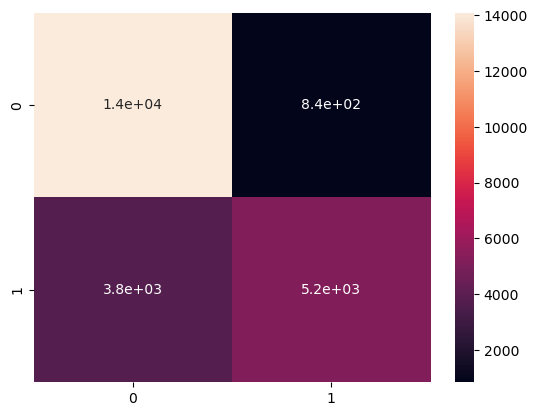

In [186]:
#I am printing the accuracy, precision, reacall and F-1 scores again even though it comes in the classification report
#because it is rounded inherently in it. Accurate scores when it is above 99.5% are not printed as it is rounded to 1.
ypred = lr_c.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

### Probability Threshold determination

In [187]:
#Using different threshold values to determine which is the best one, after extracting the predicted probabilities for the
#logistic regression model
pred_proba_df = pd.DataFrame(lr_c.predict_proba(Xtest))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(ytest, Y_test_pred[1])
    print('Our testing accuracy is {}'.format(test_accuracy))
    print('Our F-1 Score is :', f1_score(ytest,Y_test_pred[1]))
    print('Our Recall Score is :', recall_score(ytest,Y_test_pred[1]))
    print('Our Precision Score is :', precision_score(ytest,Y_test_pred[1]))

    print(classification_report(ytest,Y_test_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.45271798308066
Our F-1 Score is : 0.5750520291363164
Our Recall Score is : 0.9885957066189625
Our Precision Score is : 0.40544754218635365
              precision    recall  f1-score   support

           0       0.95      0.13      0.23     14934
           1       0.41      0.99      0.58      8944

    accuracy                           0.45     23878
   macro avg       0.68      0.56      0.40     23878
weighted avg       0.75      0.45      0.36     23878


******** For i = 0.1 ******
Our testing accuracy is 0.503015327916911
Our F-1 Score is : 0.5937767432307534
Our Recall Score is : 0.9697003577817531
Our Precision Score is : 0.4278948147417238
              precision    recall  f1-score   support

           0       0.92      0.22      0.36     14934
           1       0.43      0.97      0.59      8944

    accuracy                           0.50     23878
   macro avg       0.68      0.60      0.48     23878
weighted avg

Our testing accuracy is 0.748261998492336
Our F-1 Score is : 0.4965239969846721
Our Recall Score is : 0.3313953488372093
Our Precision Score is : 0.9896494156928214
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.50      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878


******** For i = 0.9 ******
Our testing accuracy is 0.747633805176313
Our F-1 Score is : 0.4942933870426317
Our Recall Score is : 0.32927101967799643
Our Precision Score is : 0.9909152086137282
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.

### Best threshold value in 0.5. Other models do not require threshold determination.

 ### Plotting ROC curve to compare models

C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

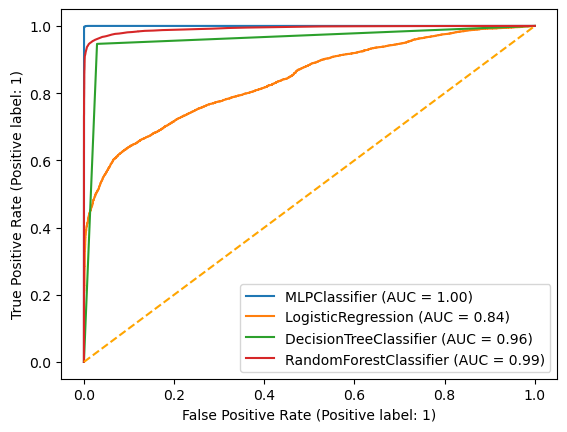

In [188]:
disp=plot_roc_curve(mlp_c, Xtest, ytest)
plot_roc_curve(lr_c, Xtest, ytest, ax=disp.ax_)
plot_roc_curve(dtc, Xtest, ytest, ax=disp.ax_)
plot_roc_curve(rfc, Xtest, ytest, ax=disp.ax_)
plt.plot([0,1], [0,1], color='orange', linestyle='--');

#### The performance metrics used to measure the models are Accuracy, Recall, Precision and F-1 score

Accuracy Score: Accuracy score is used to measure the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made. This score is used as a metric to identify how the model is performing in a high level way.

Other metrics will be used to identify the intricate details of the model to truly ascertain if the built model is good or not for the specific application.

Recall Score: Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. This metric is used in models where the cost of getting false negatives is high, like in a medical case where it's important to determine if a person has a disease or not to treat it.

Precision Score: Precision score is used to measure the model performance in measuring the count of true positives in the correct manner out of all positive predictions made. This metric is used to identify how many of the positive predictions we made are actually positive. It's important to cases where the cost of getting false positives is high.

F-1 Score: F-1 Score is the harmonic average of Recall and Precision. It can be used to assess models where neither Recall or Precision is necessarily more important than the other. High F-1 Scores usually indicate a very balanced model in terms or recall and precision.


### Before feature selection

### After feature selection

### Confidence level of model

MLPClassifier had accuracy score of 99.8534215595946% , recall score of 99.66457960644007%, precision score of 99.94393990357664%, F-1 score of 99.80406426692046% in testing data, which is new, unseen records for that specific model. So the model can be expected to perform the same when new data comes in, as long as nothing is changed.

### Recommendation for hypothetical employer